<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/week6_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def calculate_percentiles(data, percentiles):
    results = {'Nearest': {}, 'Higher': {}, 'Lower': {}, 'Standard': {}}
    for p in percentiles:
        results['Nearest'][p] = np.percentile(data, p, method='nearest')
        results['Higher'][p] = np.percentile(data, p, method='higher')
        results['Lower'][p] = np.percentile(data, p, method='lower')
        results['Standard'][p] = np.percentile(data, p, method='linear')

    return results

data = [10, 20, 30, 40, 50, 100]
percentiles = [25, 50, 75]
results = calculate_percentiles(data, percentiles)
for method, percentile_values in results.items():
    print(f'{method}:')
    for p, value in percentile_values.items():
        print(f'\t{p}th Percentile: {value}')

Nearest:
	25th Percentile: 20
	50th Percentile: 30
	75th Percentile: 50
Higher:
	25th Percentile: 30
	50th Percentile: 40
	75th Percentile: 50
Lower:
	25th Percentile: 20
	50th Percentile: 30
	75th Percentile: 40
Standard:
	25th Percentile: 22.5
	50th Percentile: 35.0
	75th Percentile: 47.5


In [3]:
from sklearn import datasets

# load data
digits = datasets.load_digits()

# check 1st sample with its label
print('1st sample\n', digits.images[0], '\n')
print('It\'s label:', digits.target[0])

1st sample
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

It's label: 0


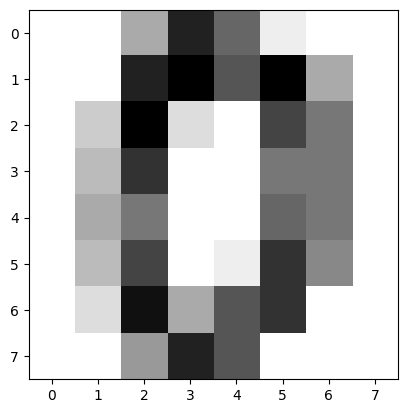

In [4]:
import matplotlib.pyplot as plt

# visualization of 1st sameple
plt.imshow(digits.images[0], cmap='binary')
plt.show()

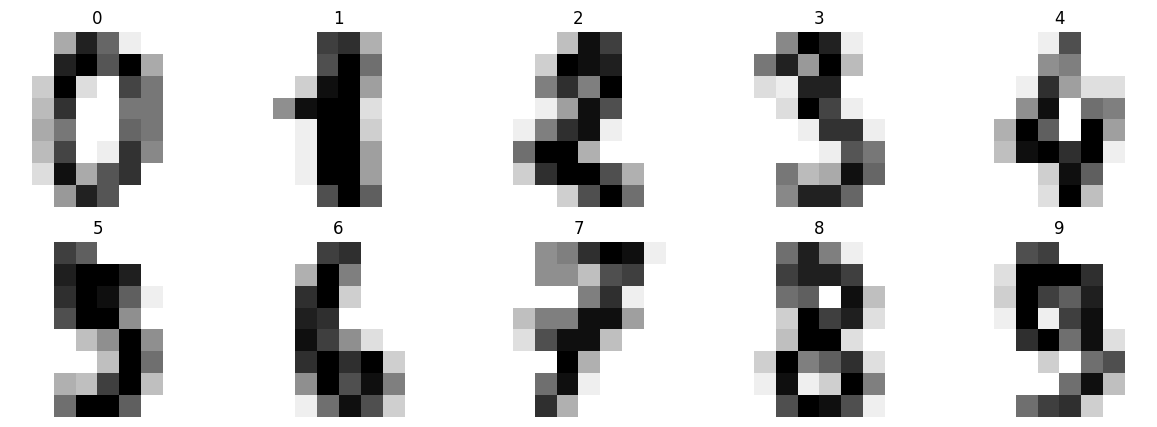

In [5]:
# visualization of first 10 samples with labels
fig = plt.figure(figsize=(15, 5))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='binary')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [9]:
from sklearn.neural_network import MLPClassifier

# neural network (hyperparameters) design
#hiddenlayer 5로 줄이고 실습해보기
mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation='logistic',
                    solver='sgd',
                    learning_rate_init=.1,
                    verbose=True)

In [11]:
# dimension adjustment
X = digits.images.reshape((len(digits.images),
                           digits.images.shape[1]*digits.images.shape[2]))
print('1st sample in vector form:', X[0], '\n')

y = digits.target
print('Its label:', y[0])

1st sample in vector form: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

Its label: 0


In [12]:
# training data
X_train = X[:1000]
y_train = y[:1000]

# test data
X_test = X[1000:]
y_test = y[1000:]

In [13]:
# train neural network
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.26852188
Iteration 2, loss = 2.08148710
Iteration 3, loss = 1.91991716
Iteration 4, loss = 1.75471158
Iteration 5, loss = 1.59453664
Iteration 6, loss = 1.44153341
Iteration 7, loss = 1.31456352
Iteration 8, loss = 1.20842203
Iteration 9, loss = 1.11185654
Iteration 10, loss = 1.02826479
Iteration 11, loss = 0.97723999
Iteration 12, loss = 0.91787349
Iteration 13, loss = 0.85931184
Iteration 14, loss = 0.85058257
Iteration 15, loss = 0.80911852
Iteration 16, loss = 0.73921902
Iteration 17, loss = 0.72346049
Iteration 18, loss = 0.69657139
Iteration 19, loss = 0.64596255
Iteration 20, loss = 0.61037510
Iteration 21, loss = 0.60606602
Iteration 22, loss = 0.58358017
Iteration 23, loss = 0.56210506
Iteration 24, loss = 0.59767826
Iteration 25, loss = 0.52342323
Iteration 26, loss = 0.51015327
Iteration 27, loss = 0.49329440
Iteration 28, loss = 0.48250901
Iteration 29, loss = 0.47572268
Iteration 30, loss = 0.48059455
Iteration 31, loss = 0.44662701
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.1, solver='sgd', verbose=True)

In [14]:
# performance check for first 10 test samples
print('Answers:', y_test[:10])
predictions = mlp.predict(X_test)
print('Predicted values:', predictions[:10])

Answers: [1 4 0 5 3 6 9 6 1 7]
Predicted values: [1 4 0 5 3 6 9 6 1 7]


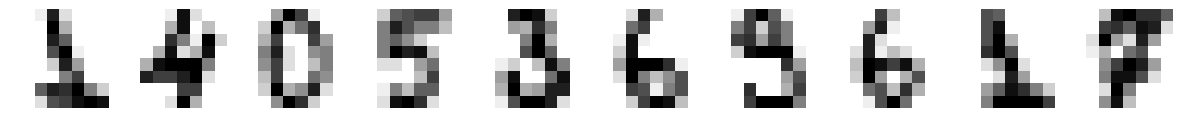

In [15]:
# visualization of fisrt 10 test samples
fig = plt.figure(figsize=(15, 5))
for i in range(1000, 1010):
    plt.subplot(1, 10, i-999)
    plt.imshow(digits.images[i], cmap='binary')
    plt.axis('off')
plt.show()

In [16]:
import pandas as pd

# confusion matrix for test data
pd.crosstab(y_test, predictions,
            rownames=['Answer'], colnames=['Predicted value'],
            margins=True)

Predicted value,0,1,2,3,4,5,6,7,8,9,All
Answer,,,,,,,,,,,
0,75,0,0,0,2,0,2,0,0,0,79
1,2,60,0,1,2,2,5,1,0,7,80
2,0,0,64,11,0,0,0,1,1,0,77
3,0,0,2,71,0,5,0,0,1,0,79
4,1,1,0,0,79,0,0,0,2,0,83
5,0,4,0,0,4,67,0,2,0,5,82
6,0,3,0,0,0,0,77,0,0,0,80
7,0,1,0,9,1,2,0,67,0,0,80
8,1,2,1,8,0,1,2,3,57,1,76


In [17]:
from sklearn.neural_network import MLPClassifier

# neural network (hyperparameters) design
#hiddenlayer 는 15로 동일
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    solver='sgd',
                    learning_rate_init=.1,
                    verbose=True)

In [18]:
# dimension adjustment
X = digits.images.reshape((len(digits.images),
                           digits.images.shape[1]*digits.images.shape[2]))
print('1st sample in vector form:', X[0], '\n')

y = digits.target
print('Its label:', y[0])

1st sample in vector form: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

Its label: 0


In [25]:
# training data
#traning data 1000 -> 500으로 줄여보기
X_train = X[:500]
y_train = y[:500]

# test data
X_test = X[500:1000]
y_test = y[500:1000]

In [26]:
# train neural network
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.31499359
Iteration 2, loss = 2.12606824
Iteration 3, loss = 1.96981383
Iteration 4, loss = 1.81387904
Iteration 5, loss = 1.64912470
Iteration 6, loss = 1.47939853
Iteration 7, loss = 1.30642617
Iteration 8, loss = 1.14493987
Iteration 9, loss = 0.99570842
Iteration 10, loss = 0.86341489
Iteration 11, loss = 0.72936329
Iteration 12, loss = 0.63158586
Iteration 13, loss = 0.55411244
Iteration 14, loss = 0.46727145
Iteration 15, loss = 0.41052567
Iteration 16, loss = 0.36176634
Iteration 17, loss = 0.32558156
Iteration 18, loss = 0.28473607
Iteration 19, loss = 0.26614548
Iteration 20, loss = 0.23046626
Iteration 21, loss = 0.21264925
Iteration 22, loss = 0.19608411
Iteration 23, loss = 0.17850482
Iteration 24, loss = 0.16465580
Iteration 25, loss = 0.14974357
Iteration 26, loss = 0.13854431
Iteration 27, loss = 0.12980379
Iteration 28, loss = 0.12219035
Iteration 29, loss = 0.11485676
Iteration 30, loss = 0.10908730
Iteration 31, loss = 0.10352768
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, solver='sgd', verbose=True)

In [27]:
# performance check for first 10 test samples
print('Answers:', y_test[:10])
predictions = mlp.predict(X_test)
print('Predicted values:', predictions[:10])

Answers: [8 2 2 5 7 9 5 4 8 8]
Predicted values: [2 2 2 5 7 9 5 4 8 8]


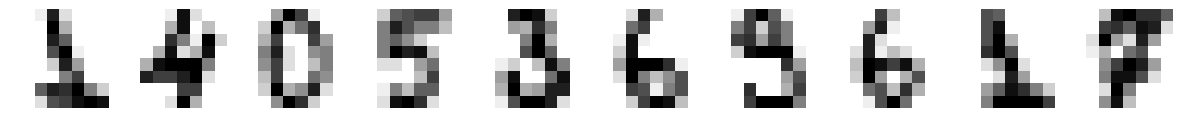

In [29]:
# visualization of fisrt 10 test samples
fig = plt.figure(figsize=(15, 5))
for i in range(1000, 1010):
    plt.subplot(1, 10, i-999)
    plt.imshow(digits.images[i], cmap='binary')
    plt.axis('off')
plt.show()

In [30]:
import pandas as pd

# confusion matrix for test data
pd.crosstab(y_test, predictions,
            rownames=['Answer'], colnames=['Predicted value'],
            margins=True)

Predicted value,0,1,2,3,4,5,6,7,8,9,All
Answer,,,,,,,,,,,
0,47,0,0,0,1,0,0,0,0,0,48
1,0,38,0,0,0,1,6,0,3,2,50
2,0,0,47,1,0,0,1,0,0,1,50
3,0,0,5,42,0,0,1,0,0,3,51
4,0,0,0,0,47,0,1,1,0,0,49
5,1,0,0,0,1,44,0,0,0,4,50
6,2,0,0,0,0,0,48,0,0,0,50
7,0,0,0,1,0,0,0,46,0,2,49
8,0,6,2,1,0,0,5,0,34,4,52
